# Assignment 3:

### Arun Agarwal
#### 915774866
### Homework 3
2/6/2022 - 2/10/2022

### Problem 1:

Explain why computing the proximity between two attributes is often simpler than computing the similarity between two objects:

First, as a general definition/notion, proximity refers to grouping objects that are closer together. In contrast, similarity refers to grouping objects that are more alike/similar. 

An object can (and most likely will) contain multiple attributes of differing types, so computing the similarity of two objects would require finding a way to computer similarity of each attribute and subsequently combining the similarities. While this process can be done pretty easily using certain equations, it is still more complicated than the equation/process for calculating proximity. Proximity can be measured using Euclidean distance or correlation values, which is generally simpler to compute and mathematically well-founded. 

At the same time, it could be the case that the data type of an attribute is the same as the data type of the attribute it is being compared to, which makes the computation of similarity comparably simple to the computation of proximity. 

In data mining, computing the similarity measure can sometimes be a redundant step if we already need to compute the dissimilarity. For example, if we wanted to compute a similarity measure using Euclidean distance, we would need to transform the dissimilarity score into a similarity measure using the formula s = 1 -d, where s is the similarity score, and d is the Euclidean distance. Thus, just interpreting the dissimilarity measure would be simpler since the two measures move inversely from one another. The distinction of similarity and dissimilarity remains repetitive in the discussion of proximity as it accounts for both, by definition. 

It should be noted that, while computing the proximity between two attributes may be often simpler, a similarity score still holds much relevance for a number of data mining techniques, such as clustering, nearest neighbor classification, anomaly detection, and more. 

### Problem 2:

Compute the cosine measure using the raw frequencies between the following two sentences:

(a) “The sly fox jumped over the lazy dog.”

(b) “The dog jumped at the intruder.”

To compute the cosine measure using the raw frequencies between the above sentences, we will make two functions:
1. text_to_vector: Makes a vector of the words in a given sentence with their counts
2. get_cosine: computes the cosine measure between the two inputted sentences

In [30]:
import math
import re
from collections import Counter #Used to get count of words

#Compiling a regex pattern into a regular expression object for text_to_vector function
WORD = re.compile(r"\w+")

#Finding the cosine similarity measure
def get_cosine(vec1, vec2):
    #Getting intersection (distinct values from each and those common to both)
    intersection = set(vec1.keys()) | set(vec2.keys())
    #print(intersection)
    
    #Numerator of cosine function is the sum of the products of the two vectors
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    
    #Denominator is the product of the square root of the sum of each vector's values squared
    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

#Turning the sentences into raw frequency vectors:
def text_to_vector(text):
    words = WORD.findall(text.lower())
    return Counter(words)

#Our sentences
text1 = "The sly fox jumped over the lazy dog."
text2 = "The dog jumped at the intruder."

#Raw frequency vectors created from above function
vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)
print("Raw Frequency Vector of Sentence 1: \n", vector1)
print("Raw Frequency Vector of Sentence 2: \n", vector2)

#cosine measure from above function
cosine = get_cosine(vector1, vector2)

print("Cosine Distance Measure:", cosine)
print("Cosine Similarity Measure:", 1 - cosine)

Raw Frequency Vector of Sentence 1: 
 Counter({'the': 2, 'sly': 1, 'fox': 1, 'jumped': 1, 'over': 1, 'lazy': 1, 'dog': 1})
Raw Frequency Vector of Sentence 2: 
 Counter({'the': 2, 'dog': 1, 'jumped': 1, 'at': 1, 'intruder': 1})
Cosine Distance Measure: 0.6708203932499369
Cosine Similarity Measure: 0.3291796067500631


Thus, we find that the cosine measure is approximately .6708. We note that we called a function to lowercase the given strings to easily deal with the issue of having 'The' and 'the' count as two different strings. 

### Problem 3:

Discuss how you might map correlation values from the interval [− 1,1] to the interval [0,1]:

Note that the type of transformation that you use might depend on the application that you have in mind.

Thus, consider two applications:

- Clustering time series

- Predicting the behavior of one time series given another

As noted in the question, I would map correlation values from the inerval [-1,1] to the interval [0,1] differently depending on the application:

For time series clustering, time series with relatively high positive correlations should be put together. That is, I would want to cluster time series that move together (i.e., $r \ge 0$) and discard time series that move in opposite directions. Thus, if $r \ge 0$, then $r = r$. If $r < 0$, then $r = 0$.

Next, for predicting the behavior of one time series given another, I would consider both strong negative and strong positive correlations. Specfically, I would square the [-1,1] interval to minimize the impacts of lowly correlated values (about $ -0.25 < r < 0.25$) and maximize the impact of highly correlated values (about $r > 0.5$) because any number between [-1,1], except 0, will become smaller when it is squared. But the rate of transformation for numbers with larger magnitudes is smaller than those of lesser magnitudes. This allows us to isolate those time series that have similar magnitudes. Another potential solution would be to simply have $r = \lvert r \rvert$, if we assume we only want to predict magnitude and not direction.

### Problem 4:

This exercise compares and contrasts some similarity and distance measures.

(a) For binary data, the L1 distance corresponds to the Hamming distance; that is, the number of bits that are different between two binary vectors. The Jaccard similarity is a measure of the similarity between two binary vectors. Suppose that you are comparing how similar two organisms of different species are in terms of the number of genes they share. Describe which measure, Hamming or Jaccard, would be more appropriate for comparing the genetic makeup of two organisms. Explain. (Assume that each animal is represented as a binary vector, where each attribute is 1 if a particular gene is present in the organism and 0 otherwise.)

(b) If you wanted to compare the genetic makeup of two organisms of the same species, e.g., two human beings, would you use the Hamming distance, the Jaccard coefficient, or a different measure of similarity or distance? Explain. (Note that two human beings share > 99.9% of the same genes.)

Answers:

(a) As stated the Hamming distance compares the bit similarity between two binary vectors (looks for when the bits are similar and dissimilar one to one). In contrast, the Jaccard similarity looks at the two vectors and finds the incident where both values are equal to one (making it similar to the cosine measure as it also ignores 0-0 matches). Now, since we want to look at the number of genes shared between the two organisms, we would want to see the incident where both values are equal to one for each data point in the two binary vectors. Thus, I think the best approach would be Jaccard similarity. In our calculations for Jaccard similarity, we do not take into account any genes that both organisms do not have, aloowing us to discover the level of voerlap between each of these two organism's genetic makeup. 

(b) Since our data is binary, using either the Simple Matching Coefficient (SMC), Jaccard Coefficient, or the Hamming Distance would be appropiate. However, as stated in the question, the genetic makeup of two organisms of the same species are extremely similar (for example, humans share more than 99.9% of the same genes, or less than .1% of a difference). Taking into account the magnitude of similarity between the two organisms, assessing how different the sequences are would be more insightful. Then, we should look at those values which are not shared between both organisms (therefore, the Jaccard approach would not be ideal here). Thus, I would use the Hamming distance to compare these organisms, which will look at when the bits are dissimilar one to one. 

### Problem 5:

Donor data consists of 11 records in the following format: Name Age Salary Donor(Y/N). Donor training dataset:

Nancy 21 37,000 N

Jim 27 41,000 N

Allen 43 61,000 Y

Jane 38 55,000 N

Steve 44 30,000 N

Peter 51 56,000 Y

Sayani 53 70,000 Y

Lata 56 74,000 Y

Mary 59 25,000 N

Victor 61 68,000 Y

Dale 63 51,000 Y

Compute the Gini index for the entire Donor data set, with respect to the two classes. Compute the Gini index for the portion of the data set with age at least 50.

| Name | Age | Salary | Donor |
| --- | --- | --- | --- |
| Nancy | 21 | 37,000 | N |
| Jim | 27 | 41,000 | N |
| Allen | 43 | 61,000 | Y |
| Jane | 38 | 55,000 | N |
| Steve | 44 | 30,000 | N |
| Peter | 51 | 56,000 | Y |
| Sayani | 53 | 70,000 | Y |
| Lata | 56 | 74,000 | Y |
| Mary | 59 | 25,000 | N |
| Victor | 61 | 68,000 | Y |
| Dale | 63 | 51,000 | Y |

As stated in the textbook, 
$$Gini Index = 1 - \sum_{i=0}^{c-1} p_i(t)^2$$, 
where $p_i(t)^2$ is the relative frequency of training instances that belong to class $i$ at node $t$, and $c$ is the total number of classes.

In our case, $c = 2$, $p_i(t)^2$ is the relative frequency for the two classes (Y and N), and the nodes t are Y and N.

We see that the relative frequency for Y is 6/11 and 5/11 for N.

Thus, computing the Gini Index for the entire Donor data set, with respect to the two classes, we have:

$$Gini_2class =1 - \sum_{i=0}^{1} p_i(t)^2 = 1 - (\frac{6}{11})^2 - (\frac{5}{11})^2 = \frac{60}{121} \approx 0.496$$ 

Next, computing the Gini index for the portion of the data set with age at least 50, we have:

$$Gini_{age\geq50} = 1 - \sum_{i=0}^{1} p_i(t)^2 = 1 - (\frac{5}{6})^2 - (\frac{1}{6})^2 = \frac{10}{36} = \frac{5}{18} \approx 0.278$$ 

We note that we only looked at 6 values in our table now (for age greater than 50): 

| Name | Age | Salary | Donor |
| --- | --- | --- | --- |
| Peter | 51 | 56,000 | Y |
| Sayani | 53 | 70,000 | Y |
| Lata | 56 | 74,000 | Y |
| Mary | 59 | 25,000 | N |
| Victor | 61 | 68,000 | Y |
| Dale | 63 | 51,000 | Y |

### Problem 6:

Repeat the computation of the previous exercise with the use of the entropy criterion. Compute the entropy for the portion of the data set with age greater than 50.

As stated in the textbook, 
$$Entropy =  -\sum_{i=0}^{c-1} p_i(t) (log_2p_i(t))$$, 
where $p_i(t)$ is the relative frequency of training instances that belong to class $i$ at node $t$, $0log_20 = 0$ in entropy calculations, and $c$ is the total number of classes.

In our case, $c = 2$, $p_i(t)^2$ is the relative frequency for the two classes (Y and N), and the nodes t are Y and N.

Now, computing the entropy index for the entire Donor data set, with respect to the two classes, we have:

$$Entropy_{2class} =  -\sum_{i=0}^{c-1} p_i(t) (log_2p_i(t)) = -(\frac{6}{11})(log_2(\frac{6}{11})) - (\frac{5}{11})(log_2(\frac{5}{11})) \approx 0.994$$ 

Next, computing the Entropy index for the portion of the data set with age greater than or equal to 50, we have:

$$Entropy_{age \geq 50} =  -\sum_{i=0}^{c-1} p_i(t) (log_2p_i(t)) = -(\frac{5}{6})(log_2(\frac{5}{6})) - (\frac{1}{6})(log_2(\frac{1}{6})) \approx 0.650$$ 

### Problem 7:

What is the best classification accuracy that can be obtained on Donor dataset with a decision tree of depth 2, where each test results in a binary split?

After speaking with the TA, I learned that I can determine the best classification accuracy that can be obtained on Donor dataset with a decision tree of depth 2, where each test results in a binary split, using either the sklearn tree DecisionTreeClassifer (for both gini and entropy and reporting the outcomes) or using the Classification Error formula found in the textbook. Thus, here is my work using the sklearn tree DecisionTreeClassifier:

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
treeGini = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 2, min_samples_split = 2)
treeEntropy =  DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = 2, min_samples_split = 2)

#Fitting the data, where [0, 21, 370000], [1, 27, 41000],...,[10, 63, 51000] represent the occurrences,
#, and [0,0,1,0,0,1,1,1,0,1,1] represent the labels of N (0) and Y (1)
X = [[0, 21, 37000], [1, 27, 41000], [2, 43, 61000], [3, 38, 55000], [4, 44, 30000], [5, 51, 56000], 
     [6, 53, 70000], [7, 56, 74000], [8, 59, 25000], [9, 61, 68000], [10, 63, 51000]]
treeGini.fit(X, [0,0,1,0,0,1,1,1,0,1,1])
treeEntropy.fit(X, [0,0,1,0,0,1,1,1,0,1,1])

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [32]:
print("The mean accuracy on the given test data and labels for Gini is: ", treeGini.score(X, [0,0,1,0,0,1,1,1,0,1,1]))
print("The mean accuracy on the given test data and labels for Entropy is: ", treeEntropy.score(X, [0,0,1,0,0,1,1,1,0,1,1]))

The mean accuracy on the given test data and labels for Gini is:  1.0
The mean accuracy on the given test data and labels for Entropy is:  1.0


In [35]:
#I also performed the process without using the features of age and salary to see what difference it produces:
#Fitting the data, where [0], [1],...,[10] represent the occurrences,
#, and [0,0,1,0,0,1,1,1,0,1,1] represent the labels of N (0) and Y (1)
X = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
treeGini.fit(X, [0,0,1,0,0,1,1,1,0,1,1])
treeEntropy.fit(X, [0,0,1,0,0,1,1,1,0,1,1])

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [36]:
print("The mean accuracy on the given test data and labels for Gini (using only feature) is: ", treeGini.score(X, [0,0,1,0,0,1,1,1,0,1,1]))
print("The mean accuracy on the given test data and labels for Entropy (using only feature) is: ", treeEntropy.score(X, [0,0,1,0,0,1,1,1,0,1,1]))

The mean accuracy on the given test data and labels for Gini (using only feature) is:  0.8181818181818182
The mean accuracy on the given test data and labels for Entropy (using only feature) is:  0.8181818181818182


This score represents the best classification accuracy that can be obtained on Donor dataset with a decision tree of depth 2, where each test results in a binary split. The results for both Gini and Entropy are the same, which according to the TA, is alright. We see that that the classification accuracy decreases from 1.0 to .8181 when we only fit with one feature/attribute. Since we are given age and salary as attributes, they should be accounted for in the fitting and score calculations. Thus, I believe the best classification accuracy is in fact 1.0.

[Text(200.88000000000002, 181.2, 'X[2] <= 55500.0\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 9.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

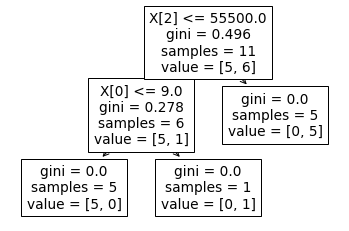

In [33]:
#Plotting the tree gini:
from sklearn import tree
tree.plot_tree(treeGini)

[Text(200.88000000000002, 181.2, 'X[2] <= 55500.0\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 9.0\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(66.96000000000001, 36.23999999999998, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 108.72, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

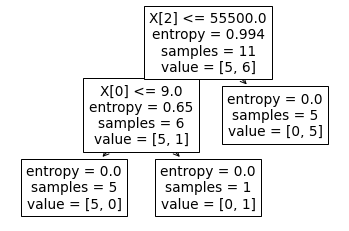

In [34]:
#Plotting the tree entropy:
from sklearn import tree
tree.plot_tree(treeEntropy)

Next, I tried using the Classification Error formula from the textbook:

$$Classification Error = 1 - max_i[p_i(t)]$$,

where $p_i(t)$ is the relative frequency of training instances that belong to class $i$ at node $t$.

Thus, we have:

$$Classification Error_{Gini} = 1 - max_i[p_i(t)] = 1 - max_i[\frac{6}{11},\frac{5}{11}] = 1 - \frac{6}{11} = \frac{5}{11}$$,

which tells us that the Classification Error is .555..., but I do not believe this provides insight into the best classification accuracy, as intended.

Thus, based on my work using the DecisionTreeClassifier above, I believe the best classification accuracy that can be obtained on Donor dataset with a decision tree of depth 2, where each test results in a binary split is approximiately 1.0.


NOTE: FOR THIS ENTIRE DOCUMENT, I HAD TO REWORK MY COMMENTS SO THAT THE WHOLE COMMENT COULD BE READ ONCE THE JUPYTER NOTEBOOK GETS CONVERTED INTO A PDF; THUS, I APOLOGIZE IF THE COMMENTS ARE POORLY FORMATTED (MY COMMENTS READ MUCH NICER BEFORE I HAD TO REFORMAT THEM)